# _Diffusion models for Gaussian distributions: Exact solutions and Wasserstein errors_ [ [ 1 ] ](#ref1)

The following code provides figures and table of the article [ [ 1 ] ](#ref1). You can use it with any covariance matrix (provided eigenvalues can be computed). All details are given to extend our analysis to other numerical schemes.

### Reminders of the theory

We consider the Variance preserving (VP) forward process:

\begin{equation}
d\boldsymbol{x}_t  =-\beta_t \boldsymbol{x}_t dt + \sqrt{2\beta_t}d\boldsymbol{w}_t, \quad 0 \leq t \leq T, \quad  \boldsymbol{x}_0 \sim p_\text{data}. \tag{1}
\end{equation}

Supposing that $p_\text{data} = \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma})$, the law of $\boldsymbol{x}_t$ is $p_t = \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_t)$ with
\begin{equation}
\boldsymbol{\Sigma}_t = e^{-2B_t}\boldsymbol{\Sigma} + (1-e^{-2B_t})\boldsymbol{I}\tag{2}
\end{equation}

where $B_t = \int_0^t \beta_u$ and consequently the score function verifies $\nabla \log p_t(\boldsymbol{x}) = -\boldsymbol{\Sigma}^{-1}_t\boldsymbol{x}$.

The associated backward SDE is

\begin{equation}
 d\tilde{\boldsymbol{y}}_t = \beta_{T-t}(\tilde{\boldsymbol{y}}_t + 2 \log p_{T-t}(\tilde{\boldsymbol{y}}_t))dt + \sqrt{2\beta_{T-t}}d\boldsymbol{w}_t, \quad0 \leq t < T \tag{3}
\end{equation}

and the reverse flow ODE is

\begin{equation}
 	d\widehat{\boldsymbol{y}}_t = \left[\beta_{T-t}\widehat{\boldsymbol{y}}_t +\beta_{T-t} \nabla_{\widehat{\boldsymbol{y}}}\log p_{T-t}(\widehat{\boldsymbol{y}}_t)\right]dt, \quad 0 \leq t < T. \tag{4}
\end{equation}

We study the errors of the diffusion models by studying the Wasserstein-2 distance. For two centered Gaussians $\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_1)$ and $\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_2)$ such that $\boldsymbol{\Sigma}_1,\boldsymbol{\Sigma}_2$ are simultaneously diagonalizable with respective eigenvalues $(\lambda_{i,1})_{1\leq i \leq d}$ and $(\lambda_{i,2})_{1\leq i \leq d}$,

\begin{equation}
	\mathbf{W}_2(\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_2),\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_1)) =  \sqrt{\sum_{1 \leq i \leq d} (\sqrt{\lambda_{i,1}}-\sqrt{\lambda_{i,2}})^2}. \tag{5}
\end{equation}

In [1]:
def W2(lamb1,lamb2) :
    return np.sqrt ( np.sum( (np.sqrt(lamb1)-np.sqrt(lamb2))**2 ) )

## Packages

In [ ]:
!pip install scienceplots

In [3]:
import pylab as plt
import numpy as np
import scienceplots
plt.style.use('science')
from IPython.display import display, Markdown
import os
plt.rcParams.update(plt.rcParamsDefault)

# Load data

The Gaussian distribution is known through the eigenvalues of its covariance matrix $\boldsymbol{\Sigma}$. ```cifar10.npy``` corresponds to the Gaussian distribution fitted to the CIFAR-10 dataset. This the list of empirical covariance eigenvalues of the normalized images of the dataset. ```ADSN.npy``` corresponds to the ADSN distribution described in the paper.

In [4]:
PATH_data ='./'

lamb = np.load(PATH_data+'cifar10.npy')
#lamb = np.load(PATH_data+'ADSN.npy')

Bellow, you can choose the outputs path.

In [5]:
PATH_output = './'

## Parametrization

Let consider $\beta_t$ linear of the form: $\beta_t = t \mapsto \beta_{\text{min}} + \left(\beta_{\text{max}}-\beta_{\text{min}}\right)t$ with $\beta_\text{min} = 0.05$ and $\beta_\text{max} = 10$. The values are from [ [ 2 ] ](#ref2), up to a factor 2 to be consistent with our VP SDE. We introduce also

$$B_t = \int_0^t \beta_u du = \beta_{\text{min}}t + \left(\beta_{\text{max}}-\beta_{\text{min}}\right)\frac{t^2}{2}.$$

In [6]:
T = 1.
beta_min = 0.1/2
beta_max = 20/2

def beta(t) :
    return beta_min + t*(beta_max-beta_min)

def B(t) :
    return beta_min*t +(beta_max-beta_min)*t**2/2

# Forward process

$p_t = \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_t)$ with $\boldsymbol{\Sigma}_t = e^{-2B_t}\boldsymbol{\Sigma} + (1-e^{-2B_t})\boldsymbol{I}$. Let consider the eigenvalues of $\left(\lambda_i\right)_{1 \leq i \leq d}$ of $\boldsymbol{\Sigma}$.  $\boldsymbol{\Sigma}_t$ is diagonalizable in the same orthonormal basis and the $i$th eigenvalue of $\Sigma_t$ is

\begin{equation}
\lambda_i^t = e^{-2B_t}\lambda_i + (1-e^{-2B_t}). \tag{6}
\end{equation}

In [7]:
def lamb_Sigma_t(lamb,t) :
    ebt = np.exp(-2*B(t))
    return ebt*lamb+(1-ebt)

# Continuous Initialization error

### Continuous SDE

With an initialization $\tilde{\boldsymbol{y}}_0 \sim \mathcal{N}(\boldsymbol{0},\boldsymbol{I})$, the solution $y_t$ of Equation (3) follows the law $\tilde{q}_{t} = \tilde{p}_{T-t}$ where $\tilde{p}_t$ is the Gaussian distribution $\mathcal{N}(\boldsymbol{0},\boldsymbol{\tilde{\Sigma}}_t)$ and

\begin{equation}
\boldsymbol{\tilde{\Sigma}}_t = \boldsymbol{\Sigma}_{t}+e^{-2(B_{T}-B_t)}\boldsymbol{\Sigma}^2_{t}\boldsymbol{\Sigma}_T^{-1}(\boldsymbol{\Sigma}^{-1}_T-\boldsymbol{I}). \tag{7}
\end{equation}

Consequently, $\boldsymbol{\tilde{\Sigma}}_t$ is diagonalizable and we can compute its eigenvalues as follows.

In [8]:
def lamb_SDE_t(lamb,t) :

    lamb_t = lamb_Sigma_t(lamb,t)
    lamb_T = lamb_Sigma_t(lamb,T)

    return lamb_t+np.exp(-2*(B(T)-B(t)))*lamb_t**2/lamb_T*(1/lamb_T-1)

### Continuous ODE

With an initialization $\widehat{\boldsymbol{y}}_0 \sim \mathcal{N}(\boldsymbol{0},\boldsymbol{I})$, the solution $\widehat{y}_t$ of Equation (4) follows the law $\widehat{q}_{t} = \widehat{p}_{T-t}$ where $\widehat{p}_t$ is the Gaussian distribution $\mathcal{N}(\boldsymbol{0},\boldsymbol{\widehat{\Sigma}}_t)$ and

\begin{equation}
\boldsymbol{\widehat{\Sigma}}_t = \boldsymbol{\Sigma}^{-1}_T\boldsymbol{\Sigma}_{t}. \tag{8}
\end{equation}

Consequently, $\boldsymbol{\tilde{\Sigma}}_t$ is diagonalizable and we can compute its eigenvalues as follows.

In [9]:
def lamb_ODE_t(lamb,t) :

    lamb_t = lamb_Sigma_t(lamb,t)
    lamb_T = lamb_Sigma_t(lamb,T)


    return lamb_t/lamb_T

# Discretization of the equations

## Discretization of the bacward SDE

Under Gaussian assumption, Equation (3) becomes:

\begin{equation}
 d\tilde{\boldsymbol{y}}_t = \beta_{T-t}(\tilde{\boldsymbol{y}}_t - 2\boldsymbol{\Sigma}^{-1}_{T-t}(\tilde{\boldsymbol{y}}_t))dt + \sqrt{2\beta_{T-t}}d\boldsymbol{w}_t, \quad0 \leq t < T. \tag{9}
\end{equation}

We study the Euler-Maruyama's scheme (EM) and the Exponential Integrator scheme (EI).

### Euler Maruyama's scheme

The EM discretization of Equation (9) is
\begin{equation}
\boldsymbol{y}^{\text{EM},k+1} = \boldsymbol{y}^{\text{EM},k} + \Delta_t \beta_{T-t_k}\left(\boldsymbol{y}_{k}-2\Sigma_{T-t_k}^{-1}\boldsymbol{y}^{\text{EM},k}\right)+ \sqrt{2\Delta_t \beta_{T-t_k}}\boldsymbol{z}_k, \quad \boldsymbol{z}_k \sim \mathcal{N}_0. \tag{10}
\end{equation}

Consequently, the $i$th eigenvalue $\lambda_i^{EM,k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{EM}}\right)_{0 \leq k \leq N-1}$ verifies

\begin{equation}
\lambda_i^{\text{EM},k+1} = \left(1+\Delta_t \beta_{T-t_k}\left(1-\tfrac{2}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{EM},k} + 2\Delta_t \beta_{T-t_k} \tag{11}
\end{equation}

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{EM},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.

In [10]:
def W2_EM(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_EM = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_EM = np.ones_like(lamb)

    if all_t :
        W2_EM_list = [W2(lamb_EM,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk = lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_EM =  (1+Delta_t*beta_T_tk*(1-2/lamb_T_tk))**2*lamb_EM + 2*Delta_t*beta_T_tk

        if all_t :
            W2_EM_list.append(W2(lamb_EM,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_EM_list.reverse()
        return W2_EM_list

    else :
        return W2(lamb_EM,lamb)

### Exponential Integrator (EI) scheme

The EI discretization of Equation (9) is
\begin{equation}
\boldsymbol{y}^{\text{EI},k+1} = \boldsymbol{y}^{\text{EI},k} + \gamma_{1,k}\left(\boldsymbol{y}^{\text{EI},k+1}-2\Sigma_{T-t_k}^{-1}\boldsymbol{y}^{\text{EI},k}\right)+ \sqrt{2\gamma_{2,k}}\boldsymbol{z}_k \quad \boldsymbol{z}_k\sim \mathcal{N}_0 \tag{12}
\end{equation}

with
$\gamma_{1,k}  = \exp\left(B_{T-t_{k}}-B_{T-t_{k+1}}\right)-1$ and $\gamma_{2,k}  = \frac{1}{2}\left[\exp\left(2\left(B_{T-t_{k}}-B_{T-t_{k+1}}\right)\right)-1\right]$.

Consequently, the $i$th eigenvalue $\lambda_i^{\text{EI},k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{EI}}\right)_{0 \leq k \leq N-1}$ verifies

\begin{equation}
\lambda_i^{\text{EI},k+1} = \left(1+\gamma_{1,k}\left(1-\tfrac{2}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{EI},k}+ 2\gamma_{2,k} \tag{13}
\end{equation}

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{EI},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.


In [11]:
def W2_EI(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_EI = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_EI = np.ones_like(lamb)

    if all_t :
        W2_EI_list = [W2(lamb_EI,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        gamma_1_k = np.exp(B(T-tk[k])-B(T-tk[k+1]))-1
        gamma_2_k = (np.exp(2*(B(T-tk[k])-B(T-tk[k+1])))-1)/2

        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])

        beta_T_tk = beta(T-tk[k])


        lamb_EI = (1+gamma_1_k*(1-2/lamb_T_tk))**2*lamb_EI + 2*gamma_2_k

        if all_t :

            W2_EI_list.append(W2(lamb_EI,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_EI_list.reverse()

        return W2_EI_list

    else :

        return W2(lamb_EI,lamb)

### DDPM scheme

Denoting $\beta^\text{DDPM}_k = \Delta_t\beta\left(\frac{k}{N}\right)$,

\begin{equation}
\tag{14}
\boldsymbol{y}^{\text{DDPM},k+1}  = \frac{1}{\sqrt{1-\beta_k^\text{DDPM}}}\left(\boldsymbol{y}^{\text{DDPM},k}- \beta_k^\text{DDPM} \boldsymbol{\Sigma}^{-1}_{T-t_k}\boldsymbol{y}^{\text{DDPM},k}\right) + \sqrt{\beta^\text{DDPM}_k}\boldsymbol{z}_k,~\boldsymbol{z}_k \sim \mathcal{N}_0
\end{equation}

Consequently, the $i$th eigenvalue $\lambda_i^{\text{DDPM},k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{DDPM}}\right)_{0 \leq k \leq N-1}$ verifies

\begin{equation}
\lambda_i^{\text{DDPM},k+1}  = \frac{1}{1-\beta_k^\text{DDPM}} \left(1- \tfrac{\beta_k^\text{DDPM}}{\lambda_{i,T-t_k}}\right)^2\lambda_i^{\text{DDPM},k}+ \beta^\text{DDPM}_k
\tag{15}
\end{equation}

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{DDPM},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.


In [13]:
def W2_DDPM(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #beta_t_DDPM = 2*Delta_t*beta(tk)

    #Initialization at p_T
    if p_T :
        lamb_DDPM = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_DDPM = np.ones_like(lamb)

    if all_t :
        W2_DDPM_list = [W2(lamb_DDPM,lamb_Sigma_t(lamb,T))]

    betas = []
    for k in range(N-1) :
        lamb_T_tk = lamb_Sigma_t(lamb,T-tk[k])
        
        beta_ddpm  = 2*Delta_t*beta(T-tk[k])

        alpha_ddpm = 1-beta_ddpm

        lamb_DDPM =  (1/np.sqrt(alpha_ddpm)*(1-beta_ddpm/lamb_T_tk))**2*lamb_DDPM + beta_ddpm

        if all_t :
            W2_DDPM_list.append(W2(lamb_DDPM,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_DDPM_list.reverse()
        return W2_DDPM_list

    else :
        return W2(lamb_DDPM,lamb)

## Discretization of the flow ODE

Under Gaussian assumption, Equation (4) becomes

\begin{equation}
 	d\widehat{\boldsymbol{y}}_t = \left[\beta_{T-t}\widehat{\boldsymbol{y}}_t -\beta_{T-t} \boldsymbol{\Sigma}^{-1}_{T-t}(\widehat{\boldsymbol{y}}_t)\right]dt, \quad 0 \leq t < T. \tag{15}
\end{equation}

We study the Euler scheme and the Heun's scheme.

## Euler scheme

The EM discretization of Equation (14) is

\begin{equation}
\boldsymbol{y}^{\text{Euler},k+1} = \boldsymbol{y}^{\text{Euler},k}+\Delta_t\beta_{T-t_k}\left(\boldsymbol{y}^{\text{Euler},k}-\Sigma^{-1}_{T-t_k}\boldsymbol{y}^{\text{Euler},k}\right). \tag{16}
\end{equation}

Consequently, the $i$th eigenvalue $\lambda_i^{Euler,k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{Euler}}\right)_{0 \leq k \leq N-1}$ verifies

\begin{equation}
\lambda_i^{\text{Euler},k+1} =\left(1+\Delta_t\beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{Euler},k} \tag{17}
\end{equation}

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{Euler},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.

In [14]:
def W2_Euler(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_Euler = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_Euler = np.ones_like(lamb)

    if all_t :
        W2_Euler_list = [W2(lamb_Euler,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_Euler = (1+Delta_t*beta_T_tk*(1-1/lamb_T_tk))**2*lamb_Euler

        if all_t :
            W2_Euler_list.append(W2(lamb_Euler,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_Euler_list.reverse()

        return W2_Euler_list

    else :

        return W2(lamb_Euler,lamb)

## Heun's scheme

The EM discretization of Equation (14) is

\begin{align}
\tag{18}
        y^{k+1/2,\text{Heun}} & = y^{k,\text{Heun}}+ \Delta_t \beta_{T-t_k}\left(y^{k,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_k}^{-1}y^{k,\text{Heun}}\right) \quad \quad \\
        y^{k+1,\text{Heun}} & = y^{k,\text{Heun}}+ \frac{\Delta_t}{2} \beta_{T-t_k}\left(y^{k,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_k}^{-1}y^{k,\text{Heun}}\right)+ \frac{\Delta_t}{2} \beta_{T-t_{k+1}}\left(y^{k+1/2,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_{k+1}}^{-1}y^{k+1/2,\text{Heun}}\right).
\end{align}


Consequently, the $i$th eigenvalue $\lambda_i^{\text{Heun},k}$ of the covariance matrix of $\left(y^{k,\text{Heun}}\right)_{0 \leq k \leq N-1}$ verifies

$$
 \lambda_i^{k+1,\text{Heun}}  = \left(1+ \frac{\Delta_t}{2} \beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)+\frac{\Delta_t}{2} \beta_{T-t_{k+1}}\left(1-\tfrac{1}{\lambda_i^{T-t_{k+1}}}\right)\left( 1+ \Delta_t \beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)\right)\right)^2\lambda_i^{k,\text{Heun}} \tag{19}
$$

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$. With $\lambda_i^{\text{Heun},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization.

In [15]:
def W2_Heun(N,lamb,t_eps=0,p_T = False,all_t = True) :
    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_Heun = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_Heun = np.ones_like(lamb)

    if all_t :
        W2_Heun_list = [W2(lamb_Heun,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_T_tk_1 =  lamb_Sigma_t(lamb,T-tk[k+1])
        beta_T_tk_1 = beta(T-tk[k+1])


        lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun

        if all_t :
            W2_Heun_list.append(W2(lamb_Heun,lamb_T_tk_1 ))

    if all_t :
        W2_Heun_list.reverse()

        return W2_Heun_list

    else :

        return W2(lamb_Heun,lamb)

## RK4 scheme

The RK4 scheme can be written as:

\begin{equation}
\tag{20}
    y^{k+1,\text{RK4}} = y^{k,\text{RK4}} + \frac{\Delta_t}{6}\left(K_1+2K_2+2K_3+K_4\right)
\end{equation}

with

\begin{equation}
\tag{21}
\begin{array}{ll}
K_1 & = f(t_k,y^{k,\text{RK4}}) \\
K_2 & = f(t_{k+1/2},y^{k,\text{RK4}}+\tfrac{\Delta_t}{2}K_1) \\
K_3 & = f(t_{k+1/2},y^{k,\text{RK4}}+\tfrac{\Delta_t}{2}K_2) \\
K_4 & = f(t_{k+1},y^{k,\text{RK4}}+\Delta_t K_3)
\end{array}
\end{equation}

and $f(t,y) = \beta_{T-t}(I-\boldsymbol{\Sigma}^{-1}_{T-t})y$, $t_{k+1/2} = t_k+\tfrac{\Delta_t}{2}$.

Consequently, with

\begin{equation}
\tag{22}
\begin{array}{ll}
               C_1 & = \beta_{T-t_k}\left(1-\tfrac{1}{\lambda_{i,T-t_k}}\right) \\
               C_2 & = \beta_{T-t_{k+1/2}}\left(1-\tfrac{1}{\lambda_{i,T-t_{k+1/2}}}\right)\left(1+\tfrac{\Delta_t}{2}C_1\right) \\
               C_3 & = \beta_{T-t_{k+1/2}}\left(1-\tfrac{1}{\lambda_{i,T-t_{k+1/2}}}\right)\left(1+\tfrac{\Delta_t}{2}C_2\right) \\
               C_4 & = \beta_{T-t_{k+1}}\left(1-\tfrac{1}{\lambda_{i,T-t_{k+1}}}\right)\left(1+\Delta_t C_3\right), \\
\end{array}
\end{equation}

the $i$th eigenvalue $\lambda_i^{\text{RK4},k}$ of the covariance matrix of $\left(y^{k,\text{RK4}}\right)_{0 \leq k \leq N-1}$ verifies

\begin{equation}
\tag{23}
 \lambda_i^{\text{RK4},k+1}
                = \left(1+\tfrac{\Delta_t}{6}(C_1+2C_2+2C_3+C_4)\right)^2\lambda_i^{\text{RK4},k} \\
\end{equation}


In [16]:
def W2_RK4(N,lamb,t_eps=0,p_T = False,all_t = True) :
    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_RK4 = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_RK4 = np.ones_like(lamb)

    if all_t :
        W2_RK4_list = [W2(lamb_RK4,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk = lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_T_tk_12 = lamb_Sigma_t(lamb,T-tk[k]-Delta_t/2)
        beta_T_tk_12 = beta(T-tk[k]-Delta_t/2)

        lamb_T_tk_1 =  lamb_Sigma_t(lamb,T-tk[k+1])
        beta_T_tk_1 = beta(T-tk[k+1])

        C1 = (beta_T_tk*(1-1/lamb_T_tk))
        C2 = (beta_T_tk_12*(1-1/lamb_T_tk_12))*(1+Delta_t/2*C1)
        C3 = (beta_T_tk_12*(1-1/lamb_T_tk_12))*(1+Delta_t/2*C2)
        C4 = (beta_T_tk_1*(1-1/lamb_T_tk_1))*(1+Delta_t*C3)


        lamb_RK4 = (1+Delta_t/6*(C1+2*C2+2*C3+C4))**2*lamb_RK4

        if all_t :
            W2_RK4_list.append(W2(lamb_RK4,lamb_T_tk_1 ))

    if all_t :
        W2_RK4_list.reverse()

        return W2_RK4_list

    else :

        return W2(lamb_RK4,lamb)

# Error graphs

Bellow, the code to plot the Figure 1 of [ [ 1 ] ](#ref1) showing the Wasserstein value of the discretization, the initialization along the time and the truncation error.

### Discretization and initialization

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1734703716.py:29: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3829869998.py:28: RuntimeWarning: divide by zero encountered in divide
  C4 = (beta_T_tk_1*(1-1/lamb_T_tk_1))*(1+Delta_t*C3)


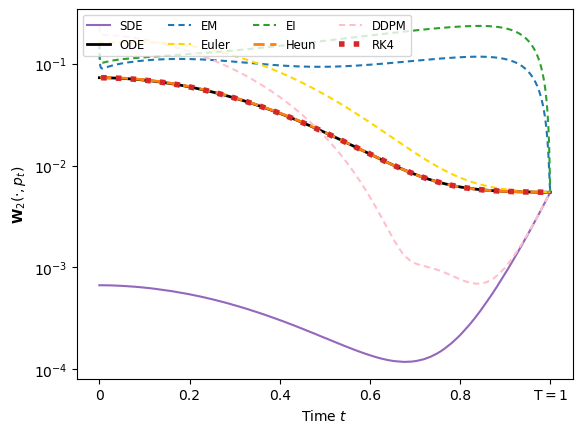

In [17]:
T = 1
NFE = 1000
tk = np.array([T*k/(NFE-1) for k in range(NFE)])
tk_Heun = np.array([T*k/(NFE//2-1) for k in range(NFE//2)])
tk_RK4 = np.array([T*k/(NFE//4-1) for k in range(NFE//4)])


W2_SDE = [W2(lamb_SDE_t(lamb,T-t),lamb_Sigma_t(lamb,T-t)) for t in tk]
W2_SDE.reverse()
W2_ODE = [W2(lamb_ODE_t(lamb,T-t),lamb_Sigma_t(lamb,T-t)) for t in tk]
W2_ODE.reverse()


das = (3,2)
#das_RK4 = (3,4)
plt.semilogy(tk,W2_SDE,'-',label='SDE',color='tab:purple')
plt.semilogy(tk,W2_ODE,'-',label='ODE',color='k',lw=2)

plt.semilogy(tk,W2_EM(NFE,lamb),'--',label='EM',dashes=das,color='C0')
plt.semilogy(tk,W2_Euler(NFE,lamb),'--',label='Euler',dashes=das,color='gold')

plt.semilogy(tk,W2_EI(NFE,lamb),'--',label='EI',dashes=das,color='tab:green')
plt.semilogy(tk_Heun,W2_Heun(NFE//2,lamb),'--',label='Heun',dashes=(4,2),color='tab:orange',lw=2)

plt.semilogy(tk,W2_DDPM(NFE,lamb),'--',label='DDPM',dashes=das,color='pink')
plt.semilogy(tk_RK4,W2_RK4(NFE//4,lamb),':',label='RK4',color='tab:red',lw=4)


plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
axes = plt.gca()
axes.xaxis.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
axes.xaxis.set_ticklabels(["0","0.2","0.4","0.6","0.8",r"$\mathrm{T} = 1$"])
axes.minorticks_off()
plt.xlabel('Time $t$')


plt.legend(loc ='upper left' ,ncol=4,fontsize='small')



#plt.savefig(PATH_output+'discretization_initialization_error.pdf', bbox_inches='tight', dpi=100)

### Truncation

In [18]:
eps_list_graph = [0,10**-5,10**-4,10**-3,10**-2]

W2_eps_EM = []
W2_eps_EI = []
W2_eps_Euler = []
W2_eps_Heun = []
W2_eps_DDPM = []
W2_eps_RK4 = []
W2_eps_SDE = []
W2_eps_ODE = []

NFE = 1000

eps_list_graph = [0,10**-5,10**-4,10**-3,10**-2]
for t_eps in eps_list_graph :
    W2_eps_EM.append(W2_EM(NFE,lamb,t_eps,all_t=False))
    W2_eps_EI.append(W2_EI(NFE,lamb,t_eps,all_t=False))
    W2_eps_DDPM.append(W2_DDPM(NFE,lamb,t_eps,all_t=False))
    W2_eps_Euler.append(W2_Euler(NFE,lamb,t_eps,all_t=False))
    W2_eps_Heun.append(W2_Heun(NFE//2,lamb,t_eps,all_t=False))
    W2_eps_RK4.append(W2_RK4(NFE//4,lamb,t_eps,all_t=False))
    W2_eps_SDE.append(W2(lamb_SDE_t(lamb,t_eps),lamb_Sigma_t(lamb,0)))
    W2_eps_ODE.append(W2(lamb_ODE_t(lamb,t_eps),lamb_Sigma_t(lamb,0)))

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3829869998.py:28: RuntimeWarning: divide by zero encountered in divide
  C4 = (beta_T_tk_1*(1-1/lamb_T_tk_1))*(1+Delta_t*C3)


<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1021798109.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')


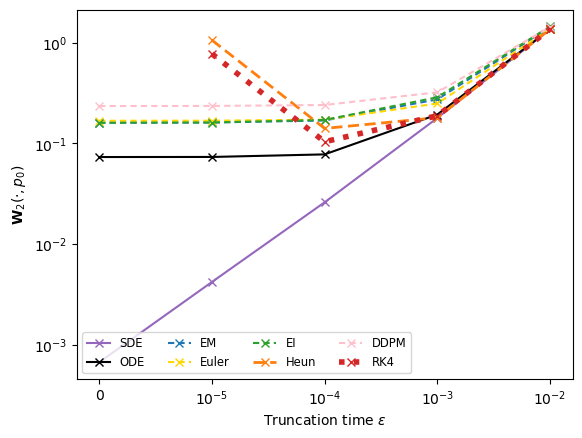

In [19]:
plt.figure()

T_eps_plot = [10**-6,10**-5,10**-4,10**-3,10**-2]
#The 'zero eps' is plotted at 10**-6 to enable the loglog setting


das = (3,2)
plt.loglog(T_eps_plot,W2_eps_SDE,'-x',label='SDE',color='tab:purple')
plt.loglog(T_eps_plot,W2_eps_ODE,'-x',label='ODE',color='k')

plt.loglog(T_eps_plot,W2_eps_EM,'--x',label='EM',dashes=das,color='C0')
plt.loglog(T_eps_plot,W2_eps_Euler,'--x',label='Euler',dashes=das,color='gold')

plt.loglog(T_eps_plot,W2_eps_EI,'--x',label='EI',dashes=das,color='tab:green')
plt.loglog(T_eps_plot,W2_eps_Heun,'--x',label='Heun',dashes=(4,2),color='tab:orange',lw=2)

plt.loglog(T_eps_plot,W2_eps_DDPM,'--x',label='DDPM',dashes=das,color='pink')
plt.loglog(T_eps_plot,W2_eps_RK4,':x',label='RK4',color='tab:red',lw=4)

#plt.legend()
axes = plt.gca()
axes.xaxis.set_ticks(T_eps_plot)
axes.xaxis.set_ticklabels(['0','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$'])
axes.minorticks_off()

plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')

plt.xlabel(r'Truncation time $\varepsilon$')


plt.legend(loc ='lower left' ,ncol=4,fontsize='small')

#plt.savefig(PATH_output+'truncation_error.pdf', bbox_inches='tight', dpi=100)

## Two graphs with the same scale

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3559415306.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3559415306.py:54: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3829869998.py:28: RuntimeWarning: divide by zero encountered in divide
  C4 = (beta_T_tk_1*(1-1/lamb_T_tk_1))*(1

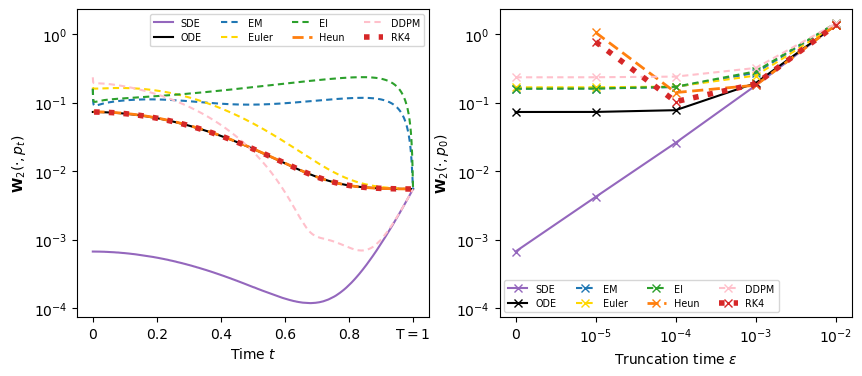

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)


das = (3,2)
plt.semilogy(tk,W2_SDE,'-',label='SDE',color='tab:purple')
plt.semilogy(tk,W2_ODE,'-',label='ODE',color='k')

plt.semilogy(tk,W2_EM(NFE,lamb),'--',label='EM',dashes=das,color='C0')
plt.semilogy(tk,W2_Euler(NFE,lamb),'--',label='Euler',dashes=das,color='gold')

plt.semilogy(tk,W2_EI(NFE,lamb),'--',label='EI',dashes=das,color='tab:green')
plt.semilogy(tk_Heun,W2_Heun(NFE//2,lamb),'--',label='Heun',dashes=(4,2),color='tab:orange',lw=2)

plt.semilogy(tk,W2_DDPM(NFE,lamb),'--',label='DDPM',dashes=das,color='pink')
plt.semilogy(tk_RK4,W2_RK4(NFE//4,lamb),':',label='RK4',color='tab:red',lw=4)

plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
axes = plt.gca()
axes.xaxis.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
axes.xaxis.set_ticklabels(["0","0.2","0.4","0.6","0.8",r"$\mathrm{T} = 1$"])

plt.xlabel('Time $t$')


plt.legend( ncol=4,fontsize='x-small')

plt.subplot(1,2,2,sharey=axes)

T_eps_plot = [10**-6,10**-5,10**-4,10**-3,10**-2]



das = (3,2)

plt.loglog(T_eps_plot,W2_eps_SDE,'-x',label='SDE',color='tab:purple')
plt.loglog(T_eps_plot,W2_eps_ODE,'-x',label='ODE',color='k')

plt.loglog(T_eps_plot,W2_eps_EM,'--x',label='EM',dashes=das,color='C0')
plt.loglog(T_eps_plot,W2_eps_Euler,'--x',label='Euler',dashes=das,color='gold')


plt.loglog(T_eps_plot,W2_eps_EI,'--x',label='EI',dashes=das,color='tab:green')
plt.loglog(T_eps_plot,W2_eps_Heun,'--x',label='Heun',dashes=(4,2),color='tab:orange',lw=2)

plt.loglog(T_eps_plot,W2_eps_DDPM,'--x',label='DDPM',dashes=das,color='pink')
plt.loglog(T_eps_plot,W2_eps_RK4,':x',label='RK4',color='tab:red',lw=4)


axes = plt.gca()
axes.xaxis.set_ticks(T_eps_plot)
axes.xaxis.set_ticklabels(['0','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$'])
axes.minorticks_off()
plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')

plt.xlabel(r'Truncation time $\varepsilon$')

plt.legend(ncol=4,fontsize='x-small')

axes_eps =  plt.gca()

#plt.savefig(PATH_output+'truncation_discretization_initialization.pdf', bbox_inches='tight', dpi=100)

# Ablation study table

The following code displays the table corresponding to Table 2 of [ [ 1 ] ](#ref1).

In [21]:
NFE_list = [50,250,500,1000] #500
eps_list = [0., 10**-5,10**-4,10**-3]
P_T = [True,False]
schemes_list = ['EM','EI','DDPM','Euler','Heun','RK4']


W2_dict = {scheme: {str(p_T):{} for p_T in P_T } for scheme in schemes_list}
W2_dict['SDE'] =  {str(p_T):{} for p_T in P_T }
W2_dict['ODE'] = {str(p_T):{} for p_T in P_T }
#Continuous integration


for scheme in ['SDE','ODE'] :
    if scheme == 'SDE' :
        lamb_funct = lamb_SDE_t
    elif scheme == 'ODE' :
        lamb_funct = lamb_ODE_t
    for t_eps in eps_list :
        W2_dict[scheme]['False'][str(t_eps)] = W2(lamb_funct(lamb,t_eps),lamb_Sigma_t(lamb,0))
        W2_dict[scheme]['True'][str(t_eps)] = W2(lamb_Sigma_t(lamb,t_eps),lamb_Sigma_t(lamb,0))


for scheme in schemes_list :

    if scheme == 'EM' :
            W2_funct = W2_EM
    elif scheme == 'EI' :
            W2_funct = W2_EI
    elif scheme == 'DDPM' :
            W2_funct = W2_DDPM
    elif scheme == 'Euler' :
            W2_funct = W2_Euler
    elif scheme == 'Heun' :
            W2_funct = W2_Heun
    elif scheme == 'RK4' :
            W2_funct = W2_RK4
    for p_T in P_T :
        for NFE in NFE_list :
            W2_dict[scheme][str(p_T)][str(NFE)] = {}
            for t_eps in eps_list :
                if scheme == 'Heun' :
                    W2_dict[scheme][str(p_T)][str(NFE)][str(t_eps)] = W2_funct(NFE//2,lamb,t_eps=t_eps,p_T = p_T ,all_t=False)
                if scheme == 'RK4' :
                    W2_dict[scheme][str(p_T)][str(NFE)][str(t_eps)] = W2_funct(NFE//4,lamb,t_eps=t_eps,p_T = p_T ,all_t=False)
                else  :
                    W2_dict[scheme][str(p_T)][str(NFE)][str(t_eps)] = W2_funct(NFE,lamb,t_eps=t_eps,p_T = p_T ,all_t=False)

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/3829869998.py:28: RuntimeWarning: divide by zero encountered in divide
  C4 = (beta_T_tk_1*(1-1/lamb_T_tk_1))*(1+Delta_t*C3)


### Markdown table

In the following, the table is displayed in the notebook via Markdown.

In [22]:
def formatting_number(x) :
    if x == 0 :
        str_x = '0'
    elif x == np.inf :
        str_x = '-'
    elif np.log10(x).is_integer() :
        str_x = '10^{'+str(int(np.log10(x)))+'}'
    elif  x > 10**2 :
        str_x = '{:1.1E}'.format(x)
    elif x < 10**-2 :
        str_x =  '{:1.1E}'.format(x)
    else :
        str_x =  '{:1.2f}'.format(x)
    return str_x

In [23]:
table_Markdown = '|||'
table_Markdown += ' Continuous||'

for NFE in NFE_list :
    table_Markdown += '  NFE =  ' +str(NFE)+'||'

table_Markdown += '\n'

table_Markdown += '|:---:|:---:|:---:|:---:|'
for NFE in NFE_list :
    table_Markdown += ':---:|:---:|'

table_Markdown += '\n'

table_Markdown += '|||$p_T$|$\mathcal{N}_0$|'
for NFE in NFE_list :
    table_Markdown += '$p_T$|$\mathcal{N}_0$|'

table_Markdown += '\n'


for scheme in schemes_list :
    table_Markdown += '|'+scheme+'|'
    for t_eps in eps_list :
        if t_eps != eps_list[0] :
          table_Markdown += '||'
        table_Markdown += r'$\varepsilon = '+formatting_number(t_eps)+'$|'
        if scheme in ['EM','EI','DDPM'] :
            table_Markdown += formatting_number(W2_dict['SDE']['True'][str(t_eps)])+'|'
            table_Markdown += formatting_number(W2_dict['SDE']['False'][str(t_eps)])+'|'
        if scheme in ['Euler','Heun','RK4'] :
            table_Markdown += formatting_number(W2_dict['ODE']['True'][str(t_eps)])+'|'
            table_Markdown += formatting_number(W2_dict['ODE']['False'][str(t_eps)])+'|'
        for NFE in NFE_list :
          table_Markdown += formatting_number(W2_dict[scheme]['True'][str(NFE)][str(t_eps)])+'|'
          table_Markdown += formatting_number(W2_dict[scheme]['False'][str(NFE)][str(t_eps)])+'|'
        table_Markdown += '\n'



Markdown(table_Markdown)

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/4277285642.py:15: SyntaxWarning: invalid escape sequence '\m'
  table_Markdown += '|||$p_T$|$\mathcal{N}_0$|'
/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_13974/4277285642.py:17: SyntaxWarning: invalid escape sequence '\m'
  table_Markdown += '$p_T$|$\mathcal{N}_0$|'


||| Continuous||  NFE =  50||  NFE =  250||  NFE =  500||  NFE =  1000||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|||$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|
|EM|$\varepsilon = 0$|0|6.7E-04|4.78|4.78|0.65|0.66|0.32|0.32|0.16|0.16|
||$\varepsilon = 10^{-5}$|4.1E-03|4.2E-03|4.77|4.77|0.66|0.66|0.32|0.32|0.16|0.16|
||$\varepsilon = 10^{-4}$|0.03|0.03|4.76|4.76|0.66|0.66|0.32|0.32|0.17|0.17|
||$\varepsilon = 10^{-3}$|0.18|0.18|4.68|4.68|0.70|0.70|0.40|0.40|0.27|0.27|
|EI|$\varepsilon = 0$|0|6.7E-04|2.81|2.81|0.57|0.57|0.30|0.30|0.16|0.16|
||$\varepsilon = 10^{-5}$|4.1E-03|4.2E-03|2.81|2.81|0.57|0.57|0.30|0.30|0.16|0.16|
||$\varepsilon = 10^{-4}$|0.03|0.03|2.82|2.82|0.58|0.58|0.31|0.31|0.17|0.17|
||$\varepsilon = 10^{-3}$|0.18|0.18|2.91|2.91|0.67|0.67|0.41|0.41|0.29|0.29|
|DDPM|$\varepsilon = 0$|0|6.7E-04|6.82|6.82|0.97|0.97|0.47|0.47|0.23|0.23|
||$\varepsilon = 10^{-5}$|4.1E-03|4.2E-03|6.82|6.82|0.97|0.97|0.47|0.47|0.24|0.23|
||$\varepsilon = 10^{-4}$|0.03|0.03|6.81|6.81|0.98|0.98|0.47|0.47|0.24|0.24|
||$\varepsilon = 10^{-3}$|0.18|0.18|6.74|6.74|1.00|1.00|0.53|0.53|0.32|0.32|
|Euler|$\varepsilon = 0$|0|0.07|1.72|1.78|0.38|0.44|0.20|0.26|0.10|0.17|
||$\varepsilon = 10^{-5}$|4.1E-03|0.07|1.72|1.78|0.38|0.44|0.20|0.26|0.10|0.17|
||$\varepsilon = 10^{-4}$|0.03|0.08|1.72|1.78|0.38|0.44|0.20|0.26|0.11|0.17|
||$\varepsilon = 10^{-3}$|0.18|0.19|1.73|1.79|0.42|0.48|0.27|0.32|0.21|0.25|
|Heun|$\varepsilon = 0$|0|0.07|-|-|-|-|-|-|-|-|
||$\varepsilon = 10^{-5}$|4.1E-03|0.07|23.42|23.42|2.86|2.87|1.05|1.06|0.37|0.38|
||$\varepsilon = 10^{-4}$|0.03|0.08|4.68|4.68|0.43|0.44|0.12|0.14|0.03|0.08|
||$\varepsilon = 10^{-3}$|0.18|0.19|0.58|0.59|0.13|0.15|0.16|0.18|0.17|0.19|
|RK4|$\varepsilon = 0$|0|0.07|-|-|-|-|-|-|-|-|
||$\varepsilon = 10^{-5}$|4.1E-03|0.07|67.32|67.32|5.49|5.49|2.11|2.11|0.77|0.77|
||$\varepsilon = 10^{-4}$|0.03|0.08|14.35|14.35|0.93|0.93|0.29|0.29|0.07|0.10|
||$\varepsilon = 10^{-3}$|0.18|0.19|2.60|2.60|0.09|0.12|0.15|0.17|0.17|0.19|


### Tex table

In the following, a table.tex is created and compiled (if pdflatex is available) to obtain Table 2 of [ [ 1 ] ](#ref1).

In [ ]:
output_tex = PATH_output + 'table.tex'

#preamble
table_tex  = r'\documentclass{article}' + '\n'
table_tex  += '\n'
table_tex  += r'\usepackage{booktabs}' + '\n'
table_tex  += r'\usepackage{multirow}' + '\n'
table_tex  += r'\usepackage{graphicx}' + '\n'
table_tex  +='\n'
table_tex  += r'\begin{document}' + '\n'
table_tex  +='\n'
#Table
table_tex  += r'\begin{table}' + '\n'
table_tex += r'\centering' + '\n'
table_tex += r'\begin{tabular}{'
table_tex += 'l'*(len(NFE_list)*len(P_T)+4) + '} \n'
table_tex += r'\toprule' + '\n'

table_tex += r'&'
table_tex += r' &\multicolumn{2}{c}{Continuous}' + '\n'

for NFE in NFE_list :
    table_tex += r'& \multicolumn{2}{c}{NFE = $'+str(NFE)+ r'$}' + '\n'

table_tex += r'\\' +'\n'

for k in range(2,len(NFE_list)*len(P_T)+4,2) :
    table_tex += r'\cmidrule(lr){'+str(k+1) +'-'+str(k+2)+ r'}' + '\n'

table_tex += r'& &$p_T$ & $\mathcal{N}_0$ & ' + '\n'
for NFE in NFE_list :
    if NFE == NFE_list[-1] :
        table_tex += r'$p_T$ & $\mathcal{N}_0$ \\' + '\n'
    else :
        table_tex += r'$p_T$ & $\mathcal{N}_0$ &' + '\n'

table_tex += r'\midrule' + '\n'

for scheme in schemes_list :
    table_tex += r'\parbox[t]{2mm}{\multirow{4}{*}{\rotatebox[origin=c]{90}{'+scheme+r'}}}' + '\n'
    #Continuous column
    for t_eps in eps_list :
        table_tex += r'& \multicolumn{1}{|l}{$\varepsilon = '+formatting_number(t_eps)+'$}\n'

        if scheme in ['EM'] :
            table_tex += ' & '+formatting_number(W2_dict['SDE']['True'][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict['SDE']['False'][str(t_eps)])+'\n'
        elif scheme in ['Euler'] :
            table_tex += ' & '+formatting_number(W2_dict['ODE']['True'][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict['ODE']['False'][str(t_eps)])+'\n'
        else :
            table_tex += '&&' + '\n'
        for NFE in NFE_list :
            table_tex += ' & '+formatting_number(W2_dict[scheme]['True'][str(NFE)][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict[scheme]['False'][str(NFE)][str(t_eps)])+'\n'
        table_tex +=  r'\\' + '\n'

table_tex += r'\bottomrule' + '\n'
table_tex += r'\end{tabular}' + '\n'
table_tex += r'\end{table}' + '\n'

table_tex += r'\end{document}'

if os.path.exists(output_tex) :
    os.remove(output_tex)

f = open(output_tex, "a")
f.write(table_tex)
f.close()

The following cell compiles the file .tex if latex is available.

In [ ]:
from distutils.spawn import find_executable
if find_executable('latex'):
    os.system('pdflatex -v '+output_tex)

# Bibliography

<a id="ref1"/>

[1] [Emile Pierret, Bruno Galerne (2025). Diffusion models for Gaussian distributions: Exact solutions and Wasserstein errors. ICML](https://openreview.net/forum?id=bxYbxzCI2R&referrer=%5BAuthor%20Console%5D(%2Fgroup%3Fid%3DICML.cc%2F2025%2FConference%2FAuthors%23your-submissions))

<a id="ref2"/>

[2] [Yang Song, Jascha Sohl-Dickstein, Diederik P. Kingma, Abhishek Kumar, Stefano Ermon, Ben Poole (2021). Score-Based Generative Modeling through Stochastic Differential Equations. ICLR](https://iclr.cc/virtual/2021/oral/3402)